In [ ]:
# Delete, google colab only stuff
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cd /content/drive/My\ Drive/AOMIC

/content/drive/My Drive/AOMIC


In [ ]:
# pooler executes max pooling, which is a downsampling method.
# If your computer is good enough, remove all code to do with pooler
# If not, you may have to change the input shape to the input shape of your own images
# in that case try print(nb.load(your_brain_location).get_fdata().shape)

from keras.layers import Conv3D, MaxPooling3D, InputLayer, Dense, Flatten
from keras.models import Sequential
import pandas as pd
import numpy as np

pooler = Sequential()
pooler.add(MaxPooling3D(input_shape = (160, 256, 256, 1)))

In [ ]:
# Participants file, obviously you would add your own with sex replaced with stage
participants = pd.read_csv('participants.tsv', sep='\t')

In [ ]:
# Loading images from hard drive, this is the important code to change
import os
import nibabel as nb

all_brains = 0

# assumes there is 'structural_brains' folder in working directory
# pooler.predict is used to downsample, remove the code if your computer is good enough
# nb.load(...).get_fdata() gets the image as a numpy array in the shape (160, 256, 256) for AOMIC
# We reshape the data to (1, 160, 256, 256, 1) and append it to all_brains
# I stopped the code execution early here

titles = os.listdir('structural_brains')[:800]
for brain in titles:
  print(brain)
  if all_brains is 0:
    all_brains = pooler.predict(np.expand_dims(np.expand_dims(nb.load('structural_brains/' + brain).get_fdata(), axis=0), axis=-1))
  else:
    all_brains = np.concatenate([all_brains, pooler.predict(np.expand_dims(np.expand_dims(nb.load('structural_brains/' + brain).get_fdata(), axis=0), axis=-1))], axis=0)


sub-0001_run-1_T1w_brain.nii.gz
sub-0002_run-1_T1w_brain.nii.gz
sub-0003_run-1_T1w_brain.nii.gz
sub-0004_run-1_T1w_brain.nii.gz
sub-0005_run-1_T1w_brain.nii.gz
sub-0006_run-1_T1w_brain.nii.gz
sub-0007_run-1_T1w_brain.nii.gz
sub-0008_run-1_T1w_brain.nii.gz
sub-0009_run-1_T1w_brain.nii.gz
sub-0010_run-1_T1w_brain.nii.gz
sub-0011_run-1_T1w_brain.nii.gz
sub-0012_run-1_T1w_brain.nii.gz
sub-0013_run-1_T1w_brain.nii.gz
sub-0014_run-1_T1w_brain.nii.gz
sub-0015_run-1_T1w_brain.nii.gz
sub-0016_run-1_T1w_brain.nii.gz
sub-0017_run-1_T1w_brain.nii.gz
sub-0018_run-1_T1w_brain.nii.gz
sub-0019_run-1_T1w_brain.nii.gz
sub-0020_run-1_T1w_brain.nii.gz
sub-0021_run-1_T1w_brain.nii.gz
sub-0022_run-1_T1w_brain.nii.gz
sub-0023_run-1_T1w_brain.nii.gz
sub-0024_run-1_T1w_brain.nii.gz
sub-0025_run-1_T1w_brain.nii.gz
sub-0026_run-1_T1w_brain.nii.gz
sub-0027_run-1_T1w_brain.nii.gz
sub-0028_run-1_T1w_brain.nii.gz
sub-0029_run-1_T1w_brain.nii.gz
sub-0030_run-1_T1w_brain.nii.gz
sub-0031_run-1_T1w_brain.nii.gz
sub-0032

In [ ]:
# Just getting the labels for each participant. [:824] was used since I stopped the previous cell execution early
labels = participants['sex'][:800] 
labels = labels.replace('female', 0)
labels =labels.replace('male', 1)
labels

0      0
1      0
2      0
3      0
4      1
      ..
795    1
796    0
797    1
798    1
799    0
Name: sex, Length: 800, dtype: int64

In [ ]:
# Main model code. You can play around with this code if you want, but it should work properly
from keras.layers import Conv3D, MaxPooling3D, InputLayer, Dense, Flatten
from keras.models import Sequential
from keras import regularizers

model = Sequential()

model.add(Conv3D(filters=128, kernel_size = 3, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(all_brains.shape[1], all_brains.shape[2], all_brains.shape[3],all_brains.shape[4])))
model.add(MaxPooling3D())
model.add(Conv3D(filters=128, kernel_size = 2, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling3D())
model.add(Conv3D(filters=128, kernel_size = 2, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling3D())
model.add(Conv3D(filters=128, kernel_size = 2, activation='relu',  kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling3D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_brains, labels, test_size=0.1, random_state=0)

1/1 [==============================] - 0s 2ms/step - loss: 2.0919 - acc: 1.0000


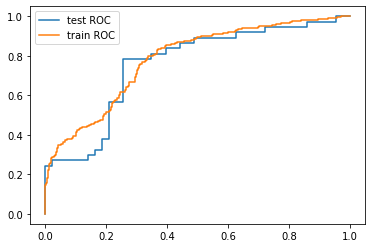

1/1 [==============================] - 0s 5ms/step - loss: 0.8966 - acc: 1.0000


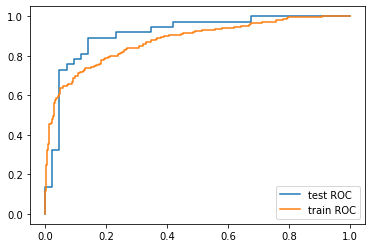

1/1 [==============================] - 0s 2ms/step - loss: 1.2419 - acc: 0.0000e+00


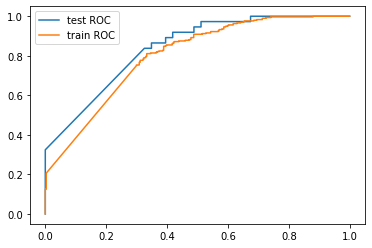

1/1 [==============================] - 0s 2ms/step - loss: 0.8155 - acc: 1.0000


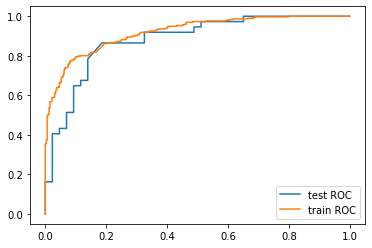

1/1 [==============================] - 0s 2ms/step - loss: 0.6205 - acc: 1.0000


KeyboardInterrupt: ignored

In [ ]:
# Training code

from random import sample
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

for i in range(10000):
  # Since Colaboratory crashes if more than 1 sample is fit, we load exactly 1 sample each time
  # If your computer is good enough, change 1 to a larger number.
  chosen = sample(range(len(x_train)), 1)

  # Fit model
  model.fit(np.asarray(x_train[chosen]), np.asarray(y_train.to_numpy()[chosen]))

  if (i % 1000 == 0) and (i != 0):
    # Make predictions and plot ROC
    predictions = []
    for t in x_test:
      predictions.append(model.predict(np.asarray([t])))

    fpr, tpr, thresh = roc_curve(np.squeeze(y_test), np.squeeze(predictions))
    plt.plot(fpr,tpr, label='test ROC')
  
    predictions = []
    for t in x_train[:-100]:
      predictions.append(model.predict(np.asarray([t])))

    fpr, tpr, thresh = roc_curve(np.squeeze(y_train[:-100]), np.squeeze(predictions))
    plt.plot(fpr,tpr, label='train ROC')
    plt.legend()
    plt.show()

    model.save('predictor.h5')